<a href="https://colab.research.google.com/github/Raninth/Resampling-weather-data-from-London/blob/main/Resampling_Datetime_Data(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#importation

import matplotlib.pyplot as plt
import pandas as pd
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [120]:
#downloading the data
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


#Part 1) Load the data and make a datetime index.

In [121]:
#Convert the date column to datetime dtype.
pd.to_datetime(df['date'])


0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [122]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [123]:
#Set the date column as the index.
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [124]:
df.index


DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [125]:
#Filter out only the required data:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp',
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [126]:
#Impute any missing values.
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [127]:
df['precipitation'].value_counts()

0.0     3663
0.2      689
0.4      289
0.6      176
1.0      159
        ... 
31.2       1
24.4       1
26.0       1
29.2       1
31.0       1
Name: precipitation, Length: 145, dtype: int64

In [128]:
df['mean_temp'].value_counts()

 8.6     68
 8.0     67
 17.2    65
 15.6    65
 16.6    65
         ..
-2.1      1
 25.7     1
-1.6      1
 26.3     1
 28.6     1
Name: mean_temp, Length: 298, dtype: int64

In [129]:
df['min_temp'].value_counts()

 7.5     62
 6.1     61
 11.9    60
 8.2     58
 9.3     58
         ..
 19.8     1
 20.3     1
 20.1     1
-4.7      1
 21.4     1
Name: min_temp, Length: 276, dtype: int64

In [130]:
df['max_temp'].value_counts()

21.5    58
11.2    51
11.1    50
12.1    50
13.9    49
        ..
31.6     1
1.6      1
32.3     1
31.3     1
35.7     1
Name: max_temp, Length: 348, dtype: int64

In [131]:
df['snow_depth'].value_counts()


0.0     5865
1.0       18
2.0       17
3.0        9
4.0        4
7.0        2
5.0        2
12.0       1
6.0        1
Name: snow_depth, dtype: int64

In [132]:
#imputing with interpolate
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [133]:
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [134]:
#checking null values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

#Part 2) Visualizations

##Q1: What month had the most precipitation between 2000 through 2010?


In [135]:
temp_cols = ['precipitation']
plot_df = df.loc['2000':'2010', 'precipitation']
plot_df

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [136]:
monthly_precipitation = df['precipitation'].resample('M').sum()
monthly_precipitation

date
2000-01-31     14.3
2000-02-29     62.2
2000-03-31     13.4
2000-04-30     71.8
2000-05-31     68.4
              ...  
2020-08-31     45.2
2020-09-30     19.2
2020-10-31    143.4
2020-11-30     47.8
2020-12-31     56.4
Freq: M, Name: precipitation, Length: 252, dtype: float64

In [137]:
#Find the date and corresponding value for the max precipitation.
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()

max_precipitation_value

148.6

In [138]:
# Ensure the index is a datetime index
plot_df.index = pd.to_datetime(plot_df.index)

# Find the index corresponding to the maximum precipitation value
max_precipitation_index = plot_df.idxmax()
max_precipitation_date = max_precipitation_index.date()
max_precipitation_value = plot_df[max_precipitation_index]


In [139]:
max_precipitation_date

datetime.date(2000, 10, 29)

<Axes: xlabel='date'>

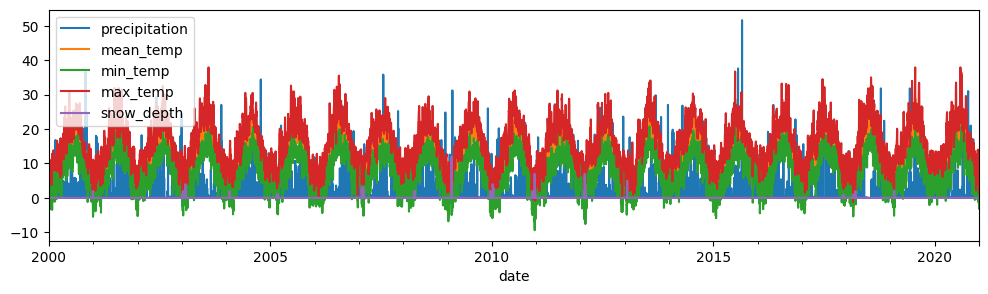

In [140]:
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)


In [141]:
loc_3months = mdates.MonthLocator(interval=3)


In [142]:
loc_year = mdates.YearLocator(1)
fmt_year = mdates.DateFormatter("%Y")

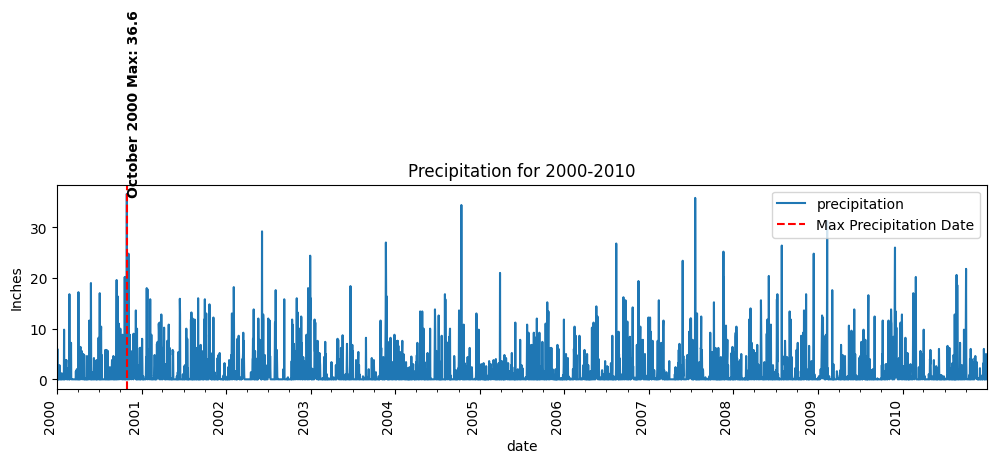

In [167]:
# Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
plot_df.plot(ax=ax,title='Precipitation for 2000-2010',ylabel='Inches')
## customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
## customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
# Add a vertical line at the date of max precipitation
# Add a vertical line at the date of max precipitation
ax.axvline(x=max_precipitation_date, color='red', linestyle='--', label='Max Precipitation Date')

# Annotate the line with the date and max precipitation value
ax.text(max_precipitation_date, max_precipitation_value,
        f'{max_precipitation_date.strftime("%B %Y")} Max: {max_precipitation_value}', rotation=90, weight='bold')

# Final adjustments for date display
fig.autofmt_xdate()

# Add legend
plt.legend()
## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

##Q2: Which year between 2000-2020 had the coolest average temperature?


In [144]:
temp_col = ['mean_temp']
ploting_df = df.loc['2000':'2020', 'mean_temp']
ploting_df

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [145]:
yearly_mean_temp = df['mean_temp'].resample('Y').mean()


In [146]:
#Determine the year and value for the lowest mean temp.
min_yearly_temp = yearly_mean_temp.idxmin()
min_yearly_temp_value = monthly_precipitation.min()
min_yearly_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [147]:
min_yearly_temp_value

0.4

In [148]:
loc_1year = mdates.loc_year = mdates.YearLocator(1)


In [149]:
loc_5year = mdates.YearLocator(5)
fmt_5year = mdates.DateFormatter("%Y")

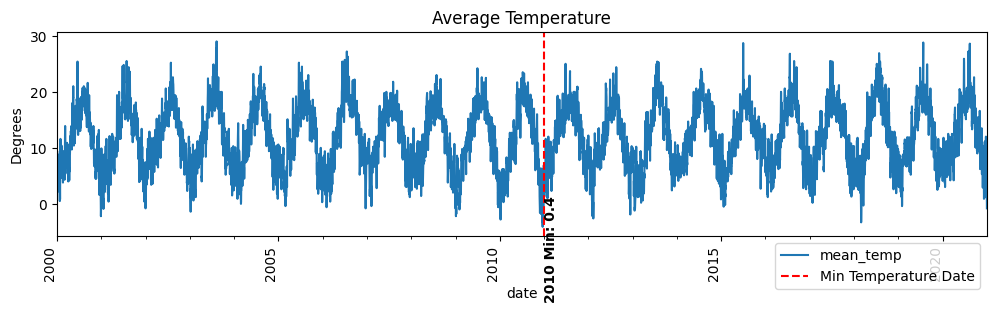

In [161]:
# Make the fig and axis first
# plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
ploting_df.plot(ax=ax,title='Average Temperature',ylabel='Degrees')
## customize minor ticks
ax.xaxis.set_minor_locator(loc_1year)
## customize major ticks
ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_5year)
# Add a vertical line at the date of max precipitation
# Add a vertical line at the date of max precipitation
ax.axvline(x=min_yearly_temp, color='red', linestyle='--', label='Min Temperature Date')

# Annotate the line with the date and max precipitation value
ax.text(min_yearly_temp, min_yearly_temp_value,
        f'{min_yearly_temp.strftime("%Y")} Min: {min_yearly_temp_value}', rotation=90, verticalalignment='center_baseline',  weight='bold')
# Final adjustments for date display
fig.autofmt_xdate()

# Add legend
ax.legend(bbox_to_anchor=(1,0))
## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)